In [1]:
#Inital import, where the data is stored in a seperate file as dictated below
import pandas as pd
original_baller = pd.read_csv('nba_2017_nba_players_with_salary.csv')
original_baller.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [2]:
#First step is to check if there is any data missing from the dataset. As we can see, FT% and 3P% have missing values.
original_baller.isnull().sum().sort_values()

Unnamed: 0          0
TRB                 0
AST                 0
STL                 0
BLK                 0
TOV                 0
PF                  0
POINTS              0
DRB                 0
TEAM                0
MPG                 0
ORPM                0
DRPM                0
RPM                 0
WINS_RPM            0
PIE                 0
PACE                0
GP                  0
W                   0
ORB                 0
FTA                 0
Rk                  0
PLAYER              0
POSITION            0
AGE                 0
MP                  0
FG                  0
FGA                 0
FG%                 0
3PA                 0
2P                  0
2PA                 0
2P%                 0
eFG%                0
FT                  0
3P                  0
SALARY_MILLIONS     0
FT%                 5
3P%                22
dtype: int64

In [3]:
#Check to see how much data is missing. If significant enough (>10%), column will be removed
#After running this cell, we find that 3P% and FT% are both under 10% missing, so we will keep them
#Conclusion: 0.064!>0.01, therefore no column data will be removed from this dataset
22/original_baller.shape[0]*100

6.432748538011696

In [4]:
#Fill in all empty datapoints with 0, as this represents the stat has never been recorded
#This will allow us to conduct regressions going forward
from pandas.api.types import is_numeric_dtype
for (colName, colData) in original_baller.iteritems():
    if is_numeric_dtype(colData):
        original_baller[colName] = colData.fillna(colData.median())
    else:
        original_baller[colName] = colData.fillna('Missing')
        

In [5]:
#Taking another look at this df, we find that we have some categorical data we do not need.
original_baller

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,337,466,Brice Johnson,PF,22,3.0,0.7,2.3,0.286,0.0,...,3,3.0,-2.32,1.08,-1.24,0.01,10.8,95.72,1,1.33
338,338,471,Mike Tobey,C,22,12.5,0.5,2.0,0.250,0.0,...,2,12.5,-1.91,0.99,-0.92,0.03,-1.6,91.41,0,0.07
339,339,475,Alonzo Gee,SF,29,6.8,0.2,1.1,0.214,0.0,...,13,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33,4,0.06
340,340,481,John Lucas III,PG,34,2.2,0.2,0.8,0.250,0.0,...,5,2.2,-1.30,-0.61,-1.91,0.01,7.3,94.47,3,0.98


In [6]:
#We remove the columns with categorical data that will not impact our df.
#We view the set after removal of columns
baller = original_baller.drop(['Unnamed: 0','POSITION','PLAYER','TEAM'],axis='columns')
baller

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,28,34.6,10.2,24.0,0.425,2.5,7.2,0.3430,7.7,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,27,36.4,8.3,18.9,0.440,3.2,9.3,0.3470,5.1,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,27,33.8,9.0,19.4,0.463,3.2,8.5,0.3790,5.8,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,23,36.1,10.3,20.3,0.505,0.5,1.8,0.2990,9.7,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,26,34.2,9.0,19.9,0.452,1.8,5.0,0.3610,7.2,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,466,22,3.0,0.7,2.3,0.286,0.0,0.0,0.3405,0.7,...,3,3.0,-2.32,1.08,-1.24,0.01,10.8,95.72,1,1.33
338,471,22,12.5,0.5,2.0,0.250,0.0,0.0,0.3405,0.5,...,2,12.5,-1.91,0.99,-0.92,0.03,-1.6,91.41,0,0.07
339,475,29,6.8,0.2,1.1,0.214,0.0,0.2,0.0000,0.2,...,13,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33,4,0.06
340,481,34,2.2,0.2,0.8,0.250,0.0,0.2,0.0000,0.2,...,5,2.2,-1.30,-0.61,-1.91,0.01,7.3,94.47,3,0.98


In [7]:
#we are looking to plot data about the relationship between columns and SALARY_MILLIONS, but we need to see the boundaries
baller['SALARY_MILLIONS'].describe()

count    342.000000
mean       7.294006
std        6.516326
min        0.030000
25%        2.185000
50%        4.920000
75%       11.110000
max       30.960000
Name: SALARY_MILLIONS, dtype: float64

In [8]:
#view and confirm that all data used from our dataset will be numerical data
baller.dtypes

Rk                   int64
AGE                  int64
MP                 float64
FG                 float64
FGA                float64
FG%                float64
3P                 float64
3PA                float64
3P%                float64
2P                 float64
2PA                float64
2P%                float64
eFG%               float64
FT                 float64
FTA                float64
FT%                float64
ORB                float64
DRB                float64
TRB                float64
AST                float64
STL                float64
BLK                float64
TOV                float64
PF                 float64
POINTS             float64
GP                   int64
MPG                float64
ORPM               float64
DRPM               float64
RPM                float64
WINS_RPM           float64
PIE                float64
PACE               float64
W                    int64
SALARY_MILLIONS    float64
dtype: object

In [9]:
#We saw from baller['SALARY_MILLIONS'].describe() that the max salary of any player in this year was $30.96 million.
#We will demonstrate the relationship between independent variables (columns) and dependent variable of Salary.
#Max for these scatterplots will be $40 million.

/Users/sriko/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


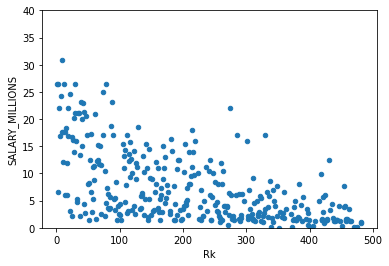

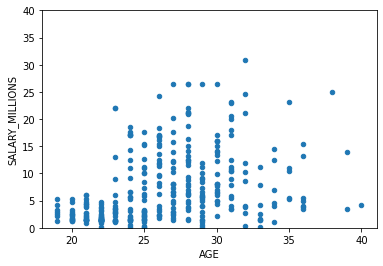

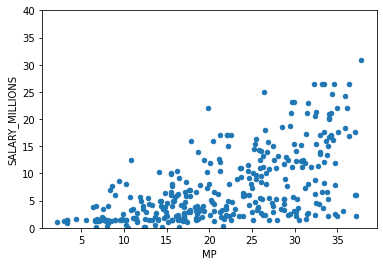

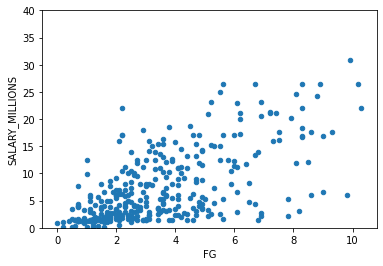

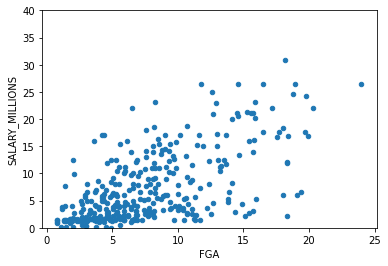

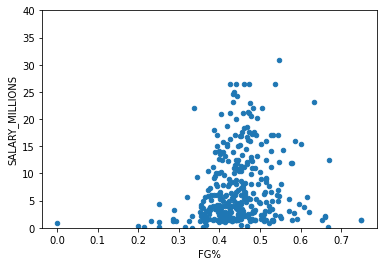

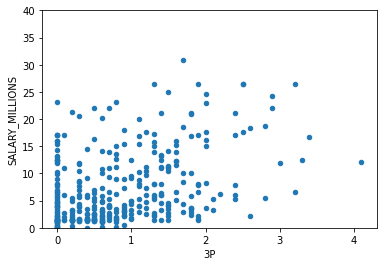

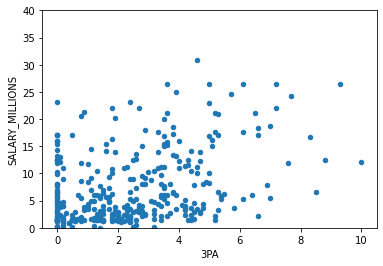

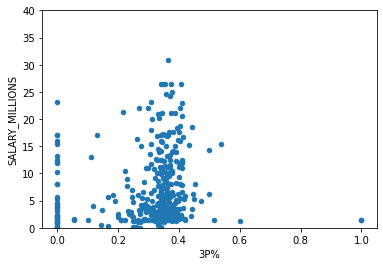

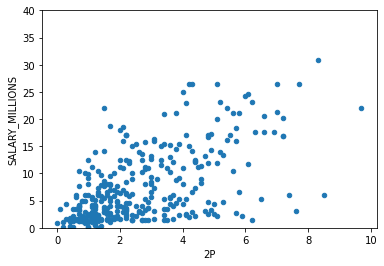

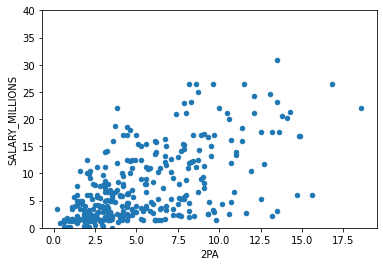

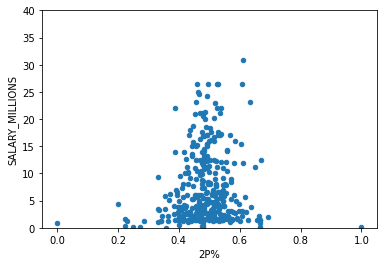

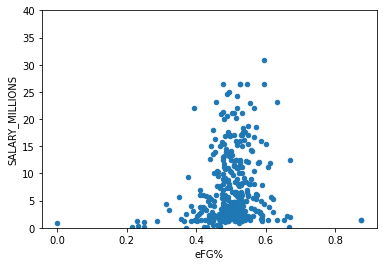

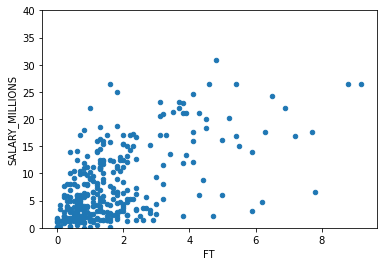

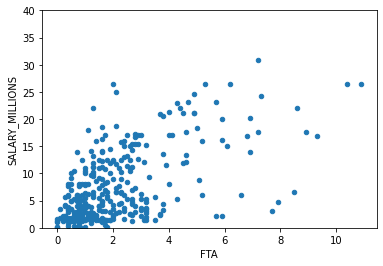

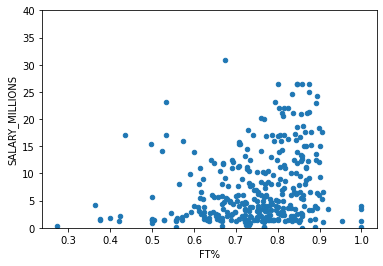

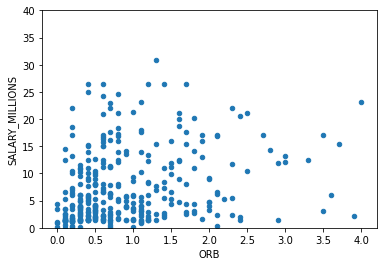

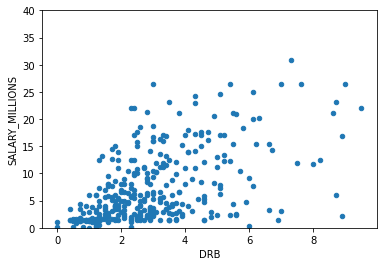

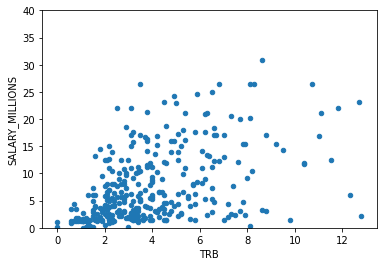

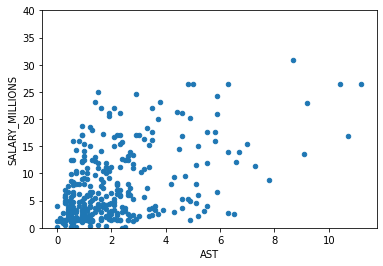

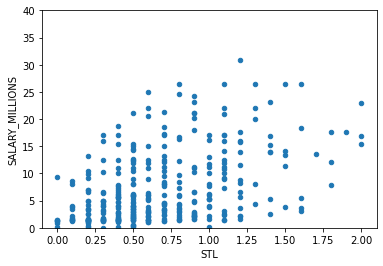

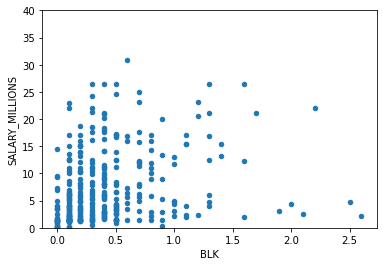

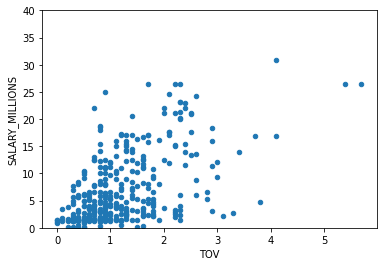

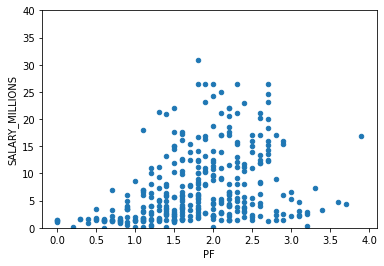

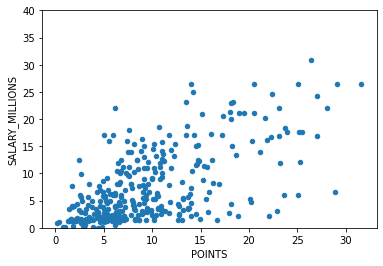

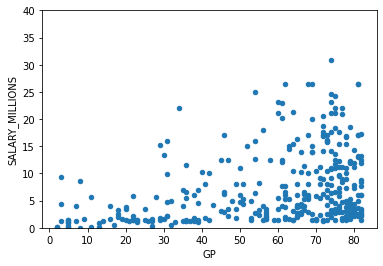

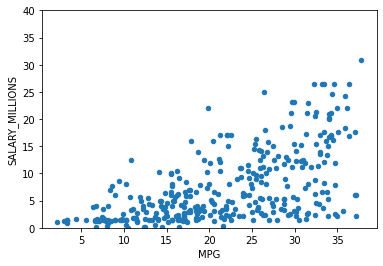

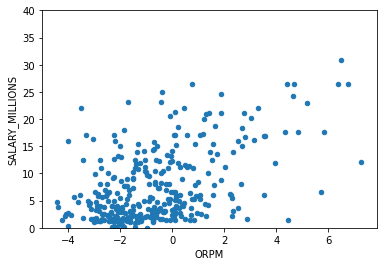

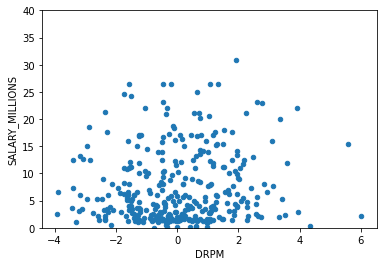

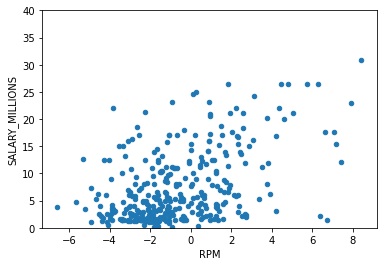

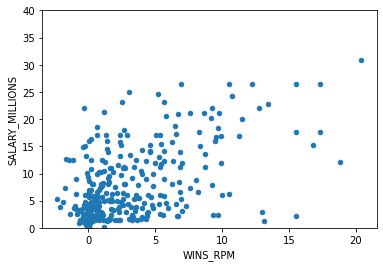

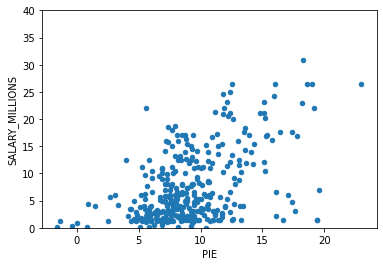

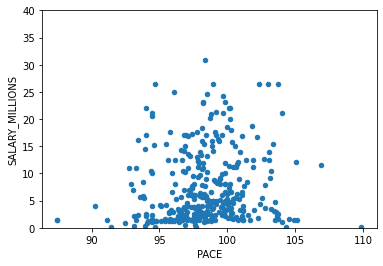

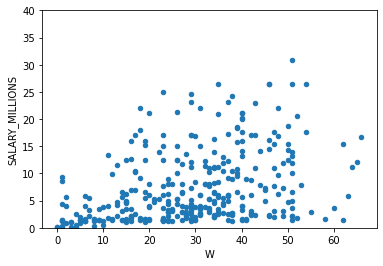

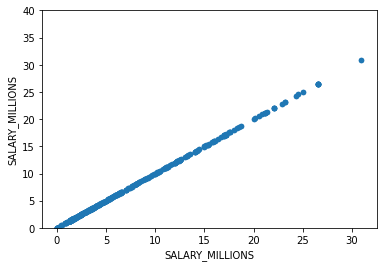

In [10]:
from pandas.api.types import is_numeric_dtype
for (colName, colData) in baller.iteritems():
    if is_numeric_dtype(colData):
        pd.concat([baller['SALARY_MILLIONS'], colData], axis=1).plot.scatter(x=colName, y='SALARY_MILLIONS', ylim=(0,40));

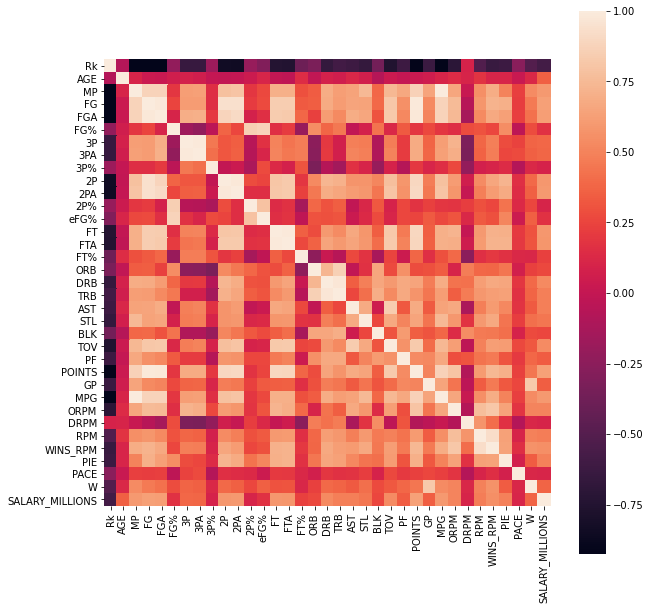

In [11]:
#import plotting functions
#plot correlation matrix with all features (columns)
import seaborn
import matplotlib.pyplot
f,ax= matplotlib.pyplot.subplots(figsize=(10, 10))
seaborn.heatmap(baller.corr(), square=True);

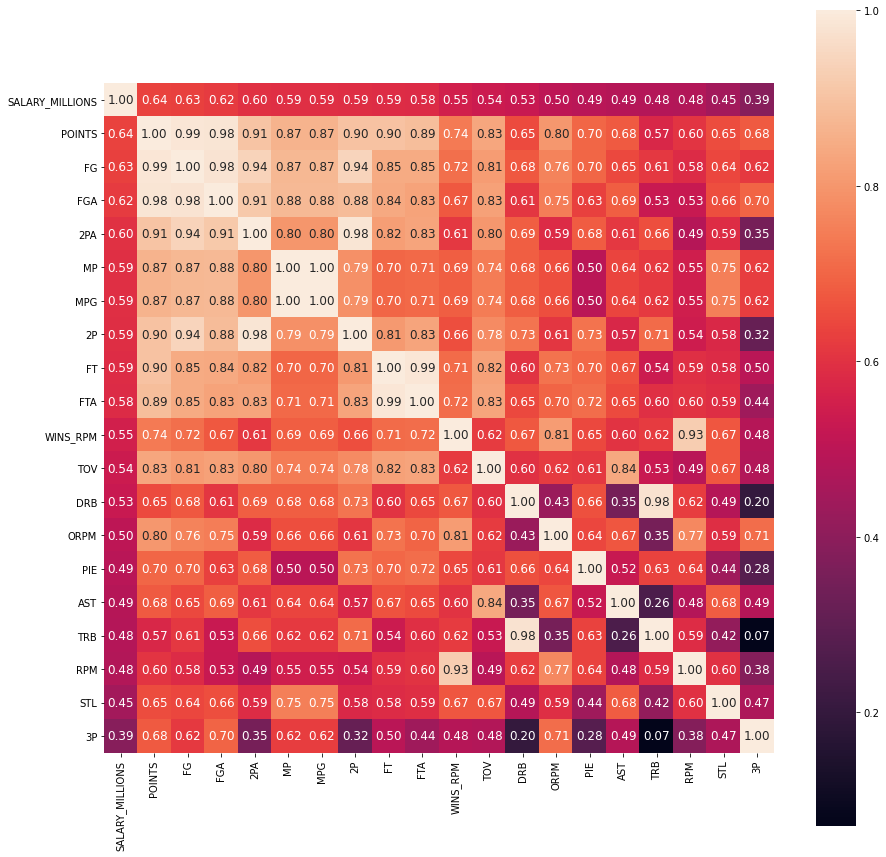

In [12]:
#Correlation matrix of top 19 features not including the Salary as a whole
#Most important takeaway is the multicolinearity present between several features
import numpy as np
cols = baller.corr().nlargest(20, 'SALARY_MILLIONS')['SALARY_MILLIONS'].index
f,ax= matplotlib.pyplot.subplots(figsize=(15, 15))
hm = seaborn.heatmap(np.corrcoef(baller[cols].values.T), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
matplotlib.pyplot.show()

In [13]:
#drop FG and FGA because there is high colinearity between FG and points as well as FGA and points
#also redundant with FG%
#inplace=True in order to remove from consideration
baller.drop(['FG','FGA'],axis='columns', inplace = True)



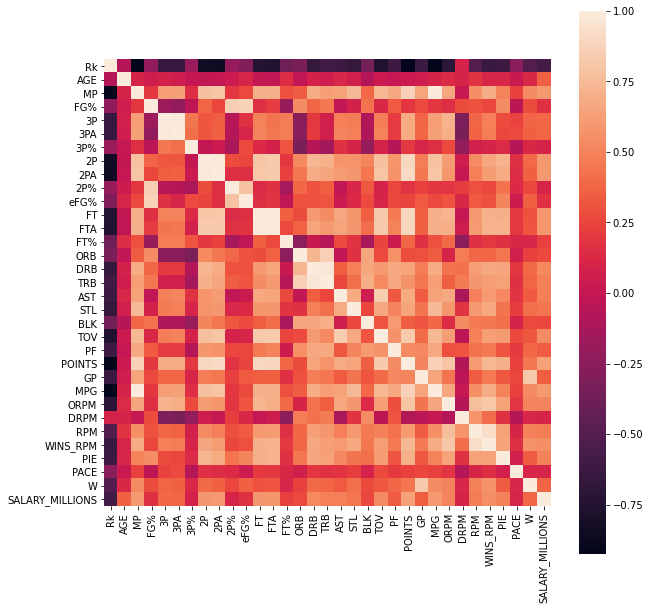

In [14]:
#View correlation matrix with features removed
import seaborn
import matplotlib.pyplot
f,ax = matplotlib.pyplot.subplots(figsize=(10, 10))
seaborn.heatmap(baller.corr(), square=True);

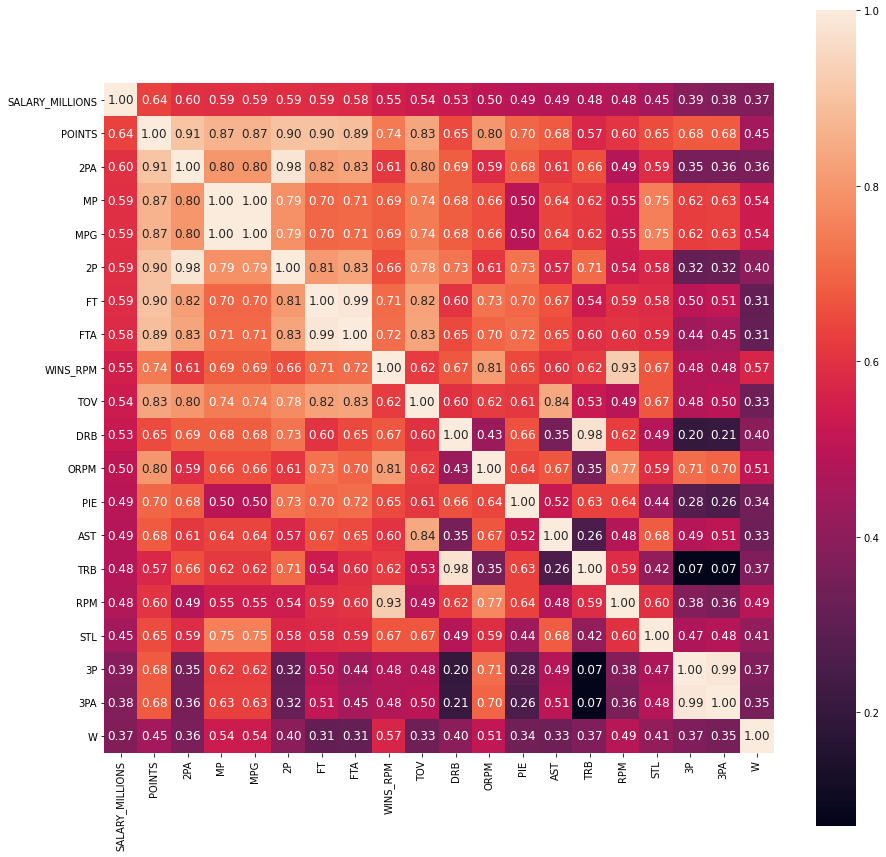

In [15]:
#Updated view of correlation matrix
import numpy as np
cols = baller.corr().nlargest(20, 'SALARY_MILLIONS')['SALARY_MILLIONS'].index
f,ax = matplotlib.pyplot.subplots(figsize=(15, 15))
hm = seaborn.heatmap(np.corrcoef(baller[cols].values.T), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
matplotlib.pyplot.show()

In [16]:
#drop 2PA, 3PA, MP, and FTA as they have high multicollinearity with 2P, 3P, MPG, and FT alike
baller.drop(['2PA','3PA','FTA','MP'],axis='columns', inplace = True)

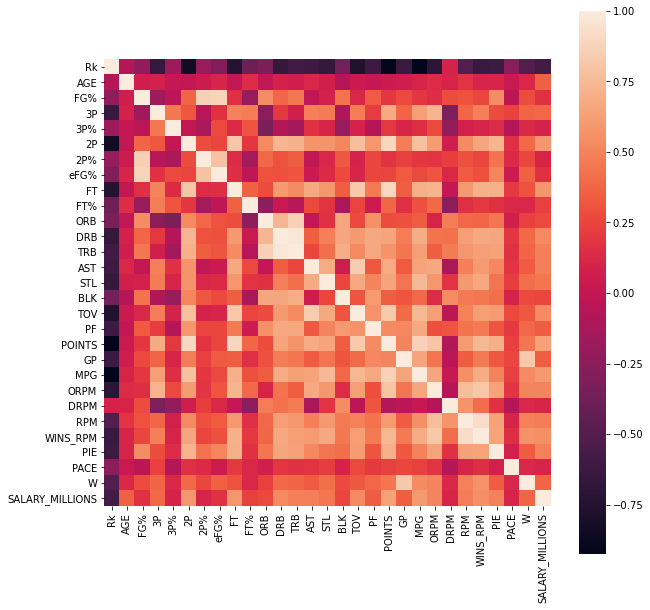

In [17]:
#Updated view of correlation matrix of all features
import seaborn
import matplotlib.pyplot
f,ax= matplotlib.pyplot.subplots(figsize=(10, 10))
seaborn.heatmap(baller.corr(), square=True);

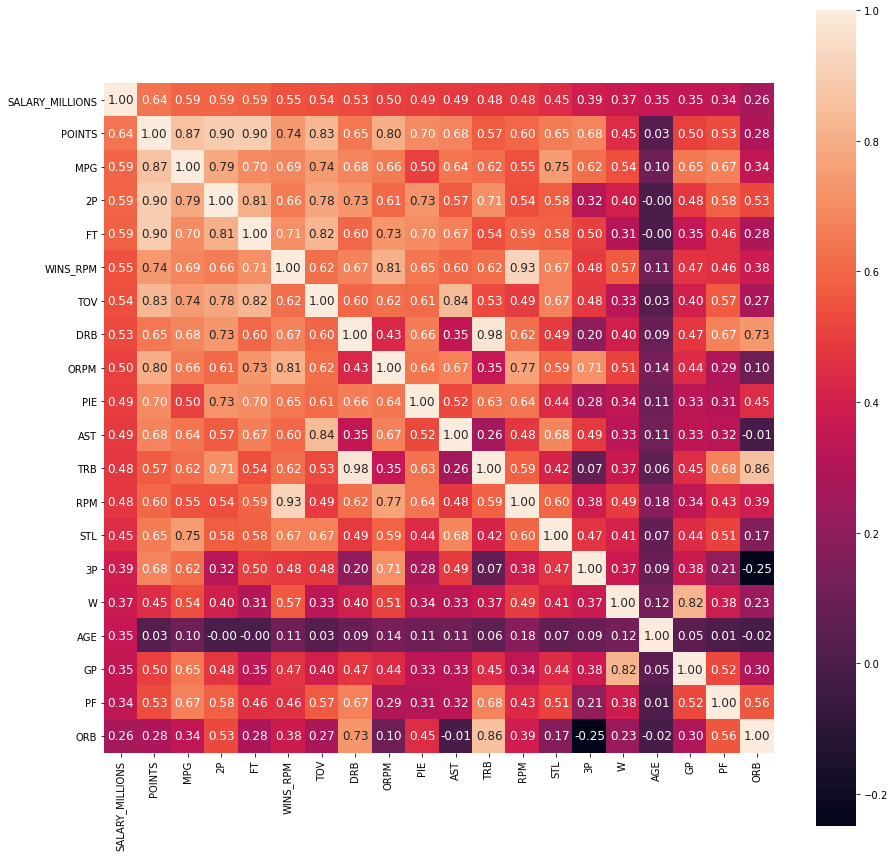

In [18]:
#Updated view of correlation matrix with 
import numpy as np
cols = baller.corr().nlargest(20, 'SALARY_MILLIONS')['SALARY_MILLIONS'].index
f,ax= matplotlib.pyplot.subplots(figsize=(15, 15))
hm = seaborn.heatmap(np.corrcoef(baller[cols].values.T), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
matplotlib.pyplot.show()

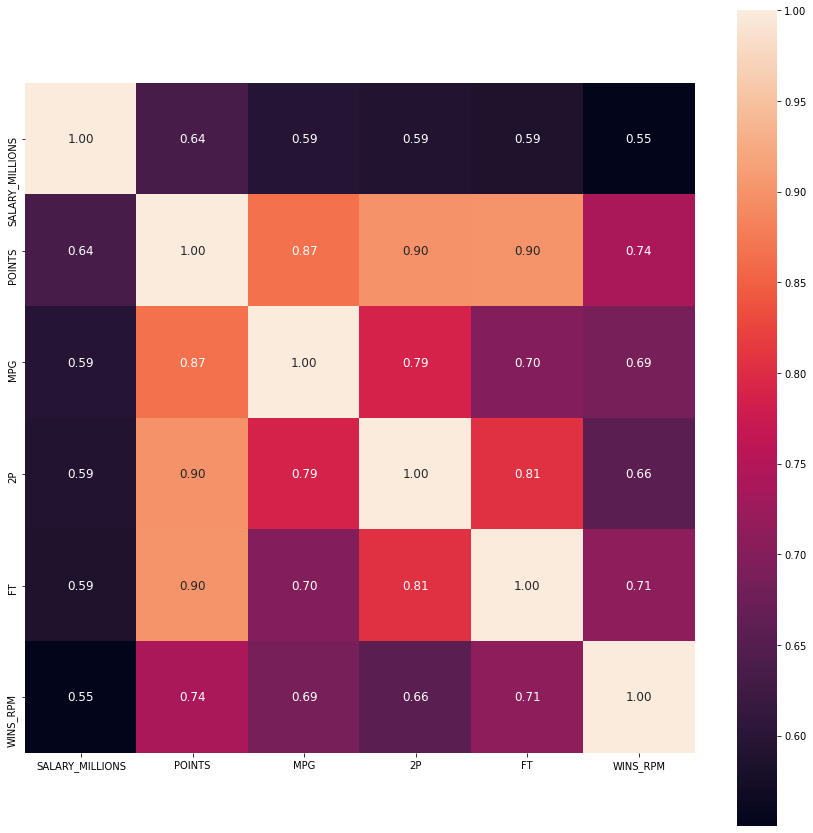

In [19]:
#View of top 5 features most correlated with Salary
import numpy as np
cols = baller.corr().nlargest(6, 'SALARY_MILLIONS')['SALARY_MILLIONS'].index
f, ax = matplotlib.pyplot.subplots(figsize=(15, 15))
hm = seaborn.heatmap(np.corrcoef(baller[cols].values.T), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
matplotlib.pyplot.show()

In [20]:
#In order to combat the issues of having a small data set and a plethora of features,
#we decided to use the top 5 features that correlate the most to Salary
#These features do have minimal multicollinearity
#We create a new df and drop the features that are not top 5 most correlated with Salary
updated_baller = baller.drop(['Rk', 'AGE', 'FG%', '3P', '3P%', '2P%', 'eFG%', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GP',
    'ORPM', 'DRPM', 'RPM', 'PIE', 'PACE', 'W'],axis = 'columns')
updated_baller.columns

Index(['2P', 'FT', 'POINTS', 'MPG', 'WINS_RPM', 'SALARY_MILLIONS'], dtype='object')

In [21]:
#Conduct linear regression using the 5 features listed in the df
#Conduct 5-fold cross validation on the linear regression of the df with only 5 features
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression
scores = cross_val_score(LinearRegression(), updated_baller.drop(['SALARY_MILLIONS'], axis='columns'), updated_baller[['SALARY_MILLIONS']], cv=5)
scores

array([-0.19775991, -0.04430395,  0.01079785,  0.06178221,  0.03678766])

In [22]:
#Conduct linear regression 5-fold cross validation accuracy on 5 feature df
metrics.r2_score(updated_baller[['SALARY_MILLIONS']], cross_val_predict(LinearRegression(), updated_baller.drop(['SALARY_MILLIONS'], axis='columns'), updated_baller[['SALARY_MILLIONS']], cv=5))



0.3170043292307433

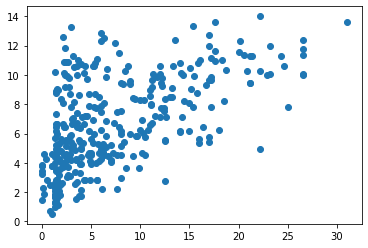

In [23]:
#PCA on linear regression and use matmplot to plot a scatter plot of result on 5 feature df
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression
LinearRegression().fit(PCA(n_components=5).fit_transform(updated_baller.drop(['SALARY_MILLIONS'], axis='columns')), updated_baller[['SALARY_MILLIONS']])
matplotlib.pyplot.scatter(updated_baller[['SALARY_MILLIONS']], cross_val_predict(LinearRegression(), updated_baller.drop(['SALARY_MILLIONS'], axis='columns'), updated_baller[['SALARY_MILLIONS']], cv=5))

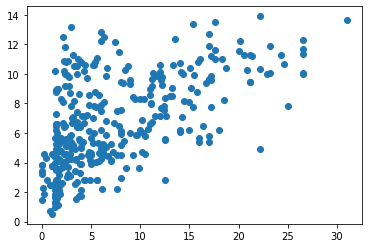

In [24]:
#Conduct ridge regressions using an alpha of 5 with 5-feature df
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5)
ridge.fit(updated_baller.drop(['SALARY_MILLIONS'], axis=1),  updated_baller[['SALARY_MILLIONS']])
matplotlib.pyplot.scatter(updated_baller[['SALARY_MILLIONS']], cross_val_predict(ridge, updated_baller.drop(['SALARY_MILLIONS'], axis=1), updated_baller[['SALARY_MILLIONS']], cv=5))

In [25]:
# Accuracy of model from cross validation on ridge regression
metrics.r2_score(updated_baller[['SALARY_MILLIONS']], cross_val_predict(ridge, updated_baller.drop(['SALARY_MILLIONS'], axis=1), updated_baller[['SALARY_MILLIONS']], cv=5))

0.31668942906631936

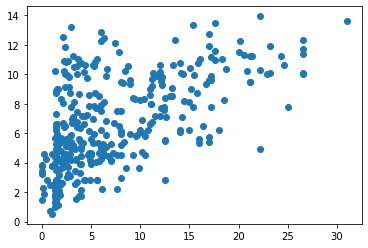

In [26]:
#Lasso regression with alpha of 0.005
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005)
lasso.fit(updated_baller.drop(['SALARY_MILLIONS'], axis=1),  updated_baller[['SALARY_MILLIONS']])
matplotlib.pyplot.scatter(updated_baller[['SALARY_MILLIONS']], cross_val_predict(lasso, updated_baller.drop(['SALARY_MILLIONS'], axis=1), updated_baller[['SALARY_MILLIONS']], cv=5))

In [27]:
# Accuracy of model from Lasso using cross validation 
metrics.r2_score(updated_baller[['SALARY_MILLIONS']], cross_val_predict(lasso, updated_baller.drop(['SALARY_MILLIONS'], axis=1), updated_baller[['SALARY_MILLIONS']], cv=5))

0.3165695316992405

In [28]:
#After looking at the inaccuracies depicted by the 5-fold cross validation and the 5-fold validation itself, 
#we chose to try running regressions with the df with all features 

In [29]:
#Conduct linear regression 5-fold cross validation acurracy
metrics.r2_score(baller[['SALARY_MILLIONS']], cross_val_predict(LinearRegression(), baller.drop(['SALARY_MILLIONS'], axis='columns'), baller[['SALARY_MILLIONS']], cv=5))



0.12782048889787678

In [30]:
#Conduct linear regression 5-fold cross validation accuracy on all-feature df
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(LinearRegression(), baller.drop(['SALARY_MILLIONS'], axis='columns'), baller[['SALARY_MILLIONS']], cv=5)
scores

array([-0.80269553,  0.12551276,  0.22267629,  0.02505244, -1.95338399])

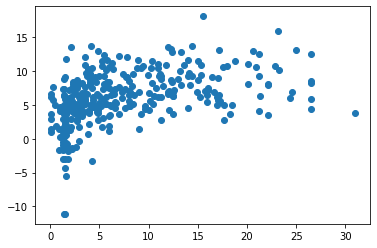

In [31]:
#PCA on linear regression and use matmplot to plot a scatter plot of result for all-feature df
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression
LinearRegression().fit(PCA(n_components=5).fit_transform(baller.drop(['SALARY_MILLIONS'], axis='columns')), baller[['SALARY_MILLIONS']])
matplotlib.pyplot.scatter(baller[['SALARY_MILLIONS']], cross_val_predict(LinearRegression(), baller.drop(['SALARY_MILLIONS'], axis='columns'), baller[['SALARY_MILLIONS']], cv=5))

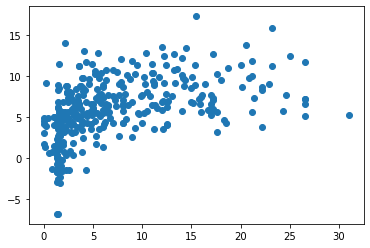

In [32]:
#Conduct ridge regressions using an alpha of 5
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5)
ridge.fit(baller.drop(['SALARY_MILLIONS'], axis=1),  baller[['SALARY_MILLIONS']])
matplotlib.pyplot.scatter(baller[['SALARY_MILLIONS']], cross_val_predict(ridge, baller.drop(['SALARY_MILLIONS'], axis=1), baller[['SALARY_MILLIONS']], cv=5))

In [33]:
# Accuracy of model from cross validation on ridge regression
metrics.r2_score(baller[['SALARY_MILLIONS']], cross_val_predict(ridge, baller.drop(['SALARY_MILLIONS'], axis=1), baller[['SALARY_MILLIONS']], cv=5))

0.1700174024117258

/Users/sriko/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1317.4468135480258, tolerance: 1.4479714211988306
  model = cd_fast.enet_coordinate_descent(
/Users/sriko/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6329012564060577, tolerance: 0.603895427106227
  model = cd_fast.enet_coordinate_descent(
/Users/sriko/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588.240746214416, tolerance: 1.2572153655677658
  model = cd_fast.enet_coordinate_descent(
/Users/sriko/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_

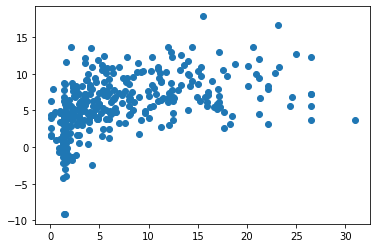

In [34]:
#Lasso regression with alpha of 0.005
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005)
lasso.fit(baller.drop(['SALARY_MILLIONS'], axis=1),  baller[['SALARY_MILLIONS']])
matplotlib.pyplot.scatter(baller[['SALARY_MILLIONS']], cross_val_predict(lasso, baller.drop(['SALARY_MILLIONS'], axis=1), baller[['SALARY_MILLIONS']], cv=5))

In [35]:
# Accuracy of model from Lasso using cross validation 
metrics.r2_score(baller[['SALARY_MILLIONS']], cross_val_predict(lasso, baller.drop(['SALARY_MILLIONS'], axis=1), baller[['SALARY_MILLIONS']], cv=5))

/Users/sriko/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6329012564060577, tolerance: 0.603895427106227
  model = cd_fast.enet_coordinate_descent(
/Users/sriko/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588.240746214416, tolerance: 1.2572153655677658
  model = cd_fast.enet_coordinate_descent(
/Users/sriko/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1228.321901713778, tolerance: 1.3114491721532846
  model = cd_fast.enet_coordinate_descent(
/Users/sriko/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_m

0.12937262136529804